Fai un programa de consola, que pasándolle unha imaxe coa cara de unha única persoa e o seu nome engada o vector que identifica a cara a un ficheiro (CSV, SQiIte, etc), onde quede asociado o nome co vector.

Este sistema de almacenaxe debería ser válido para posteriormente utilizalo noutros programas.

### Importación de librerías y carga de imagen

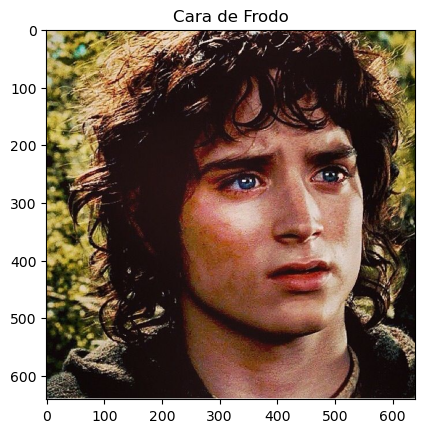

In [9]:
import cv2
from matplotlib import pyplot as plt
import dlib
import numpy as np
import csv

image = cv2.imread("frodo.jpg")
imaxe_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

nombre_sujeto = "Frodo"
archivo = "caras.csv"

plt.imshow(imaxe_color)
plt.title(f'Cara de {nombre_sujeto}')
plt.show()

### Modelos de DLib y listas en las que se guardarán vectores y nombres de los rostros

In [10]:

predictor_path ="./shape_predictor_5_face_landmarks.dat"
face_rec_model_path = "./dlib_face_recognition_resnet_model_v1.dat"


detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(predictor_path)
facerec = dlib.face_recognition_model_v1(face_rec_model_path)

### Reconocimiento facial y exportación de nombre+vector al archivo deseado

In [11]:
dets = detector(imaxe_color, 1)
print("Number of faces detected: {}".format(len(dets)))
posicions = dets[0]
shape = sp(imaxe_color,posicions)
face_descriptor = np.array(facerec.compute_face_descriptor(imaxe_color, shape))

# Exportación a csv
with open(archivo, mode="a", newline="") as f:
    escritor = csv.writer(f)
    escritor.writerow([nombre_sujeto,",".join(face_descriptor.astype(str))])

print(f"Cara de {nombre_sujeto} guardada correctamente en {archivo}.")

Number of faces detected: 1
Cara de Frodo guardada correctamente en caras.csv.
